In [1]:
!pip install ipympl

In [2]:
#%matplotlib inline
## Import libraries
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

%matplotlib widget

In [1]:
!wget http://codingai-s3.s3.amazonaws.com/public/small_shinjuku_1.mp4

--2025-10-22 11:56:25--  http://codingai-s3.s3.amazonaws.com/public/small_shinjuku_1.mp4
Resolving codingai-s3.s3.amazonaws.com (codingai-s3.s3.amazonaws.com)... 52.219.112.234, 16.15.0.245, 16.15.4.209, ...
Connecting to codingai-s3.s3.amazonaws.com (codingai-s3.s3.amazonaws.com)|52.219.112.234|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20975137 (20M) [video/mp4]
Saving to: ‘small_shinjuku_1.mp4’

small_shinjuku_1.mp 100%[===================>]  20.00M  37.2MB/s    in 0.5s    

2025-10-22 11:56:26 (37.2 MB/s) - ‘small_shinjuku_1.mp4’ saved [20975137/20975137]



In [3]:
def img_grid(images):
    return np.concatenate(images,axis=0)

In [ ]:
from IPython.display import HTML
from base64 import b64encode

# Path to your video file
video_path = "/content/small_shinjuku_1.mp4"

# Read and encode the video file
mp4 = open(video_path, 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

# Display it in the notebook
HTML(f"""
<video width="640" height="480" controls>
    <source src="{data_url}" type="video/mp4">
</video>
""")


In [4]:
!pip install ultralytics

In [5]:
from google.colab.patches import cv2_imshow

In [6]:
from ultralytics import YOLO
model = YOLO("/content/best.pt")

results =  model.predict("/content/small_shinjuku_1.mp4", stream=True)

In [7]:
results

<generator object BasePredictor.stream_inference at 0x7d00c4a81fc0>

In [8]:
res = model("/content/frame_0.jpg")


image 1/1 /content/frame_0.jpg: 384x640 8 heads, 52 persons, 153.4ms
Speed: 4.7ms preprocess, 153.4ms inference, 18.9ms postprocess per image at shape (1, 3, 384, 640)


In [9]:
res[0].orig_img.shape

(1088, 1920, 3)

In [10]:
res[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.])
conf: tensor([0.6085, 0.6065, 0.5984, 0.5907, 0.5336, 0.5193, 0.5155, 0.5015, 0.4955, 0.4891, 0.4761, 0.4685, 0.4660, 0.4418, 0.4330, 0.4321, 0.4187, 0.3964, 0.3893, 0.3821, 0.3782, 0.3758, 0.3640, 0.3581, 0.3567, 0.3538, 0.3529, 0.3417, 0.3355, 0.3333, 0.3322, 0.3302, 0.3223, 0.3202, 0.3201, 0.3104, 0.3050, 0.3046, 0.3042,
        0.2973, 0.2971, 0.2954, 0.2953, 0.2921, 0.2887, 0.2876, 0.2844, 0.2820, 0.2785, 0.2730, 0.2721, 0.2713, 0.2674, 0.2664, 0.2640, 0.2595, 0.2546, 0.2542, 0.2521, 0.2507])
data: tensor([[1.2459e+03, 9.1976e+02, 1.2917e+03, 1.0020e+03, 6.0852e-01, 1.0000e+00],
        [1.0236e+03, 6.2567e+02, 1.0587e+03, 7.1022e+02, 6.0647e-01, 1.0000e+00],
        [1.1174

In [11]:
DEFINITION = {
    0:'person',
    1:'head' # Assuming class 1 is 'head' based on the previous output
}
class Detection:
  def __init__(self,box,label,score):
    self.box=box
    self.label=DEFINITION[label.item()] # Convert tensor to scalar
    self.score=score
  def __str__(self):
    return(f"{self.label} | {self.score} | {self.box}")


def get_detections_from_results(results):
  # Access the Results object from the list before accessing the boxes attribute
  return [Detection(box, label, score) for box, label, score in zip(results[0].boxes.xyxy, results[0].boxes.cls, results[0].boxes.conf)]

detections = get_detections_from_results(res)
for detection in detections:
  print(detection)

head | 0.6085190773010254 | tensor([1245.9343,  919.7640, 1291.6613, 1001.9755])
head | 0.6064707040786743 | tensor([1023.6304,  625.6664, 1058.6595,  710.2174])
head | 0.5984331965446472 | tensor([1117.4275,  784.5500, 1161.1447,  914.7852])
head | 0.5906809568405151 | tensor([1332.3922,  761.7458, 1385.6544,  850.0781])
head | 0.5336267352104187 | tensor([ 841.0016,  944.7925,  899.4822, 1087.4141])
head | 0.5193482637405396 | tensor([ 940.3853,  938.1352,  996.5258, 1053.7882])
head | 0.5155138969421387 | tensor([1383.6479,  282.3599, 1412.9606,  341.3921])
person | 0.5015387535095215 | tensor([863.7429, 948.6546, 886.1202, 975.9738])
head | 0.4954797029495239 | tensor([952.3753, 809.6627, 994.9012, 896.0775])
person | 0.48914363980293274 | tensor([ 630.7284, 1027.0383,  648.3418, 1047.5791])
head | 0.4760606586933136 | tensor([1602.2058,  274.8135, 1626.4219,  331.4446])
head | 0.46852797269821167 | tensor([1369.3607,  937.7932, 1415.8479, 1030.8179])
head | 0.466011106967926 | ten

In [ ]:
def visualize_boxes(image,dets,color = [0,255,0]):
    """
    Visualizes detections
    """
    new_image = image.copy()
    for det in dets:
        # Access the bounding box coordinates using the 'xyxy' attribute
        box = [int(round(j)) for j in det.box.tolist()]
        cv2.rectangle(new_image,box[:2],box[2:],color,3)
    return new_image

det_img = visualize_boxes(res[0].orig_img ,detections)
cv2_imshow(det_img)



In [ ]:
def filter_detections(detections,score_min=0.01):
    dets = [det for det in detections if det.score>score_min]
    return dets


filtered_detections = filter_detections(detections)
det_img = visualize_boxes(res[0].orig_img, filtered_detections)
cv2_imshow(det_img)

In [15]:
def get_still_images_from_video(vid_name,inds = {0}):
    """
    This function is to retrieve a few still images from a video
    for demonstration purposes
    """
    cam = cv2.VideoCapture(vid_name)
    imgs = []
    i = 0
    while True:
      ret,img = cam.read()
      if not ret:
        break
      if i in inds:
        imgs.append(img)
      i+=1
    return imgs

In [ ]:
track_imgs = get_still_images_from_video('small_shinjuku_1.mp4',{0,1})
cv2_imshow(img_grid(track_imgs))

In [ ]:
def merge_images(images):
    tmp = np.zeros_like(images[0],dtype=np.float32)
    for image in images:
      tmp += image
    return tmp/float(len(images))
print("This is what the 2 images look like overlayed together")
cv2_imshow(merge_images(track_imgs))


0: 384x640 6 heads, 50 persons, 203.9ms
Speed: 5.5ms preprocess, 203.9ms inference, 15.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 heads, 44 persons, 214.6ms
Speed: 4.7ms preprocess, 214.6ms inference, 17.0ms postprocess per image at shape (1, 3, 384, 640)
Frame0 Detections in Green. Frame1 Detections in Blue


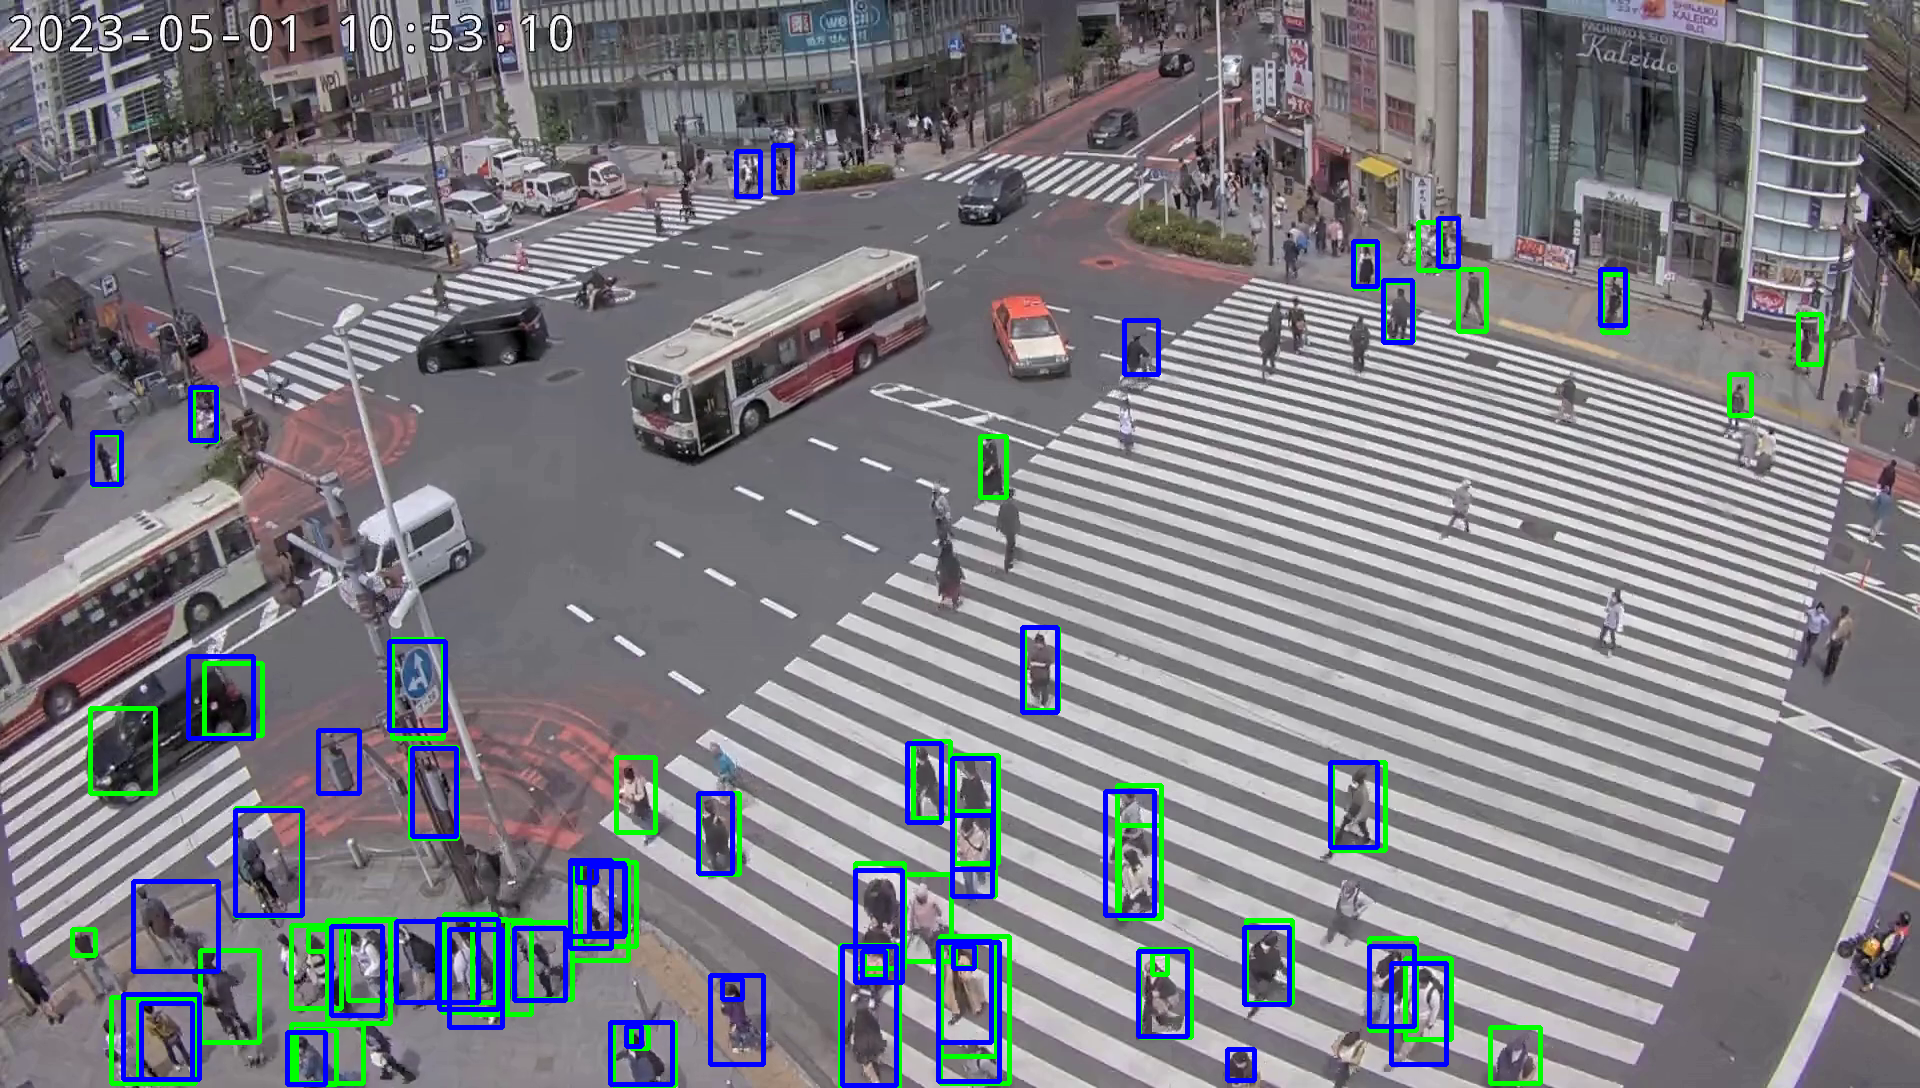

In [18]:
# Detections img0
track_results0 = model(track_imgs[0])
track_detections0 = get_detections_from_results(track_results0)
track_detections0 = filter_detections(track_detections0)

# Detections img1
track_results1 = model(track_imgs[1])
track_detections1 = get_detections_from_results(track_results1)
track_detections1 = filter_detections(track_detections1)


tmp = track_imgs[1].copy()
tmp = visualize_boxes(tmp,track_detections0,color=[0,255,0])
tmp = visualize_boxes(tmp,track_detections1,color=[255,0,0])
print("Frame0 Detections in Green. Frame1 Detections in Blue")
cv2_imshow(tmp)

In [19]:
# Choose a random person from frame0 and calculate IOU for each box in frame1
import random
import numpy as np
def iou(x1_1, y1_1, x2_1, y2_1,
        x1_2, y1_2, x2_2, y2_2):
    intersection_width = max(min(x2_1, x2_2) - max(x1_1, x1_2),0)
    intersection_height = max(min(y2_1, y2_2) - max(y1_1, y1_2),0)
    intersection_area = intersection_width * intersection_height
    box1_area = (x2_1 - x1_1) * (y2_1 - y1_1)
    box2_area = (x2_2 - x1_2) * (y2_2 - y1_2)
    union_area = box1_area + box2_area - intersection_area
    return intersection_area / union_area

my_person = track_detections0[random.randint(0,len(track_detections0)-1)]
ious = [iou(*my_person.box,*det.box) for det in track_detections1]
print("IOUs")
print(ious)

print("")
best_iou_index = np.argmax(np.array(ious))
print(f"Best IOU: {ious[best_iou_index]} at index {best_iou_index}")

my_matched_person = track_detections1[best_iou_index]

IOUs
[tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.)]

Best IOU: 0.0 at index 0


In [ ]:
# To find another random person, re-run previous cell and this one
tmp = np.zeros_like(track_imgs[1])
tmp = visualize_boxes(tmp,track_detections1,color=[255,0,0])
tmp = visualize_boxes(tmp,[my_person],color=[0,255,0])
tmp = visualize_boxes(tmp,[my_matched_person],color=[0,100,0])
print("All frame1 boxes in blue.\nRandom person from frame0 in light green.\nThe frame1 matched box in dark green")
cv2_imshow(tmp)

In [22]:
from google.colab import output
output.enable_custom_widget_manager()

In [27]:
import imageio
class VideoWriter:
    def __init__(self,name,fps=10):
        self.name=f'{name}.mp4'
        self.video = imageio.get_writer(self.name, mode='I', fps=fps, codec='libx264', bitrate='1M')
    def write(self,img):
        """
        BGR input
        """
        self.video.append_data(img[:,:,::-1])
    def release(self):
        print(f"Wrote to {self.name}")
        self.video.close()
def video_rewrite(vid):
    """
    rewrites a video in format for google colab
    """
    cam = cv2.VideoCapture(vid)
    vw = VideoWriter('tmp',fps=10)
    while True:
        ret,img = cam.read()
        if not ret:
            break
        vw.write(img)
    vw.release()

In [ ]:
my_tracked_person = None
track_imgs = get_still_images_from_video('small_shinjuku_1.mp4',{0,1})
fig, AX = plt.subplots()
AX.cla()
AX.set_title("Select a person")
tmp=track_imgs[0].copy()
tmp=visualize_boxes(tmp,track_detections0,color=[0,255,0])
tmp = tmp[:,:,::-1]
AX.imshow(tmp)
def find_closest_box(dets,coords):
  closest = 10e4
  closets_index = -1
  ix,iy = coords
  for i,det in enumerate(dets):
    x0,y0,x1,y1 = det.box
    x,y = (x0+x1)/2, (y0+y1)/2
    dist = np.sqrt(((x-ix)**2) + ((y-iy)**2))
    if dist < closest:
      closest = dist
      closest_index = i
  return closest_index

def show_point(coords, label, ax, marker_size=100):
    if label==0:
      color='red'
    else:
      color='green'
    ax.scatter([coords[0]], [coords[1]], color=color, marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
def onclick(event):
    global AX, track_imgs,track_detections0,my_tracked_person
    ix, iy = event.xdata, event.ydata
    if ix and iy:
      coords = [ix,iy]

      i=find_closest_box(track_detections0,coords)
      my_tracked_person = track_detections0[i]
      tmp=track_imgs[0].copy()
      tmp=visualize_boxes(tmp,track_detections0,color=[0,255,0])
      tmp=visualize_boxes(tmp,[my_tracked_person],color=[0,0,255])
      tmp=tmp[:,:,::-1]
      AX.cla()
      AX.set_title("Select a person")
      AX.imshow(tmp)
      show_point(coords,1,AX)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [ ]:
from IPython.display import HTML
from base64 import b64encode
from copy import deepcopy
def run_video_file(vid_name,tracked_person,max_frames=150,output='tmp'):
    cam = cv2.VideoCapture(vid_name)
    vw = VideoWriter(output)

    frame_num = 0
    while frame_num < max_frames:
      ret,img = cam.read()
      if not ret:
        break
      # Run object detector on image
      result = model(img)
      detections = get_detections_from_results(result)
      detections = filter_detections(detections)

      if tracked_person is not None:
        # Calculate IOU for each new detection
        ious = [iou(*tracked_person.box,*det.box) for det in detections]
        best_iou_index = np.argmax(np.array(ious))
        best_iou = ious[best_iou_index]
        # tracked person is updated based on iou
        tracked_person = detections[best_iou_index]

        #If iou is not a positive value, there is no match
        if best_iou <1e-5:
          tracked_person = None

      if tracked_person is not None:
        img = visualize_boxes(img,[tracked_person],[0,0,255])
      vw.write(img)

      frame_num+=1
    vw.release()

FILENAME = 'small_shinjuku_1.mp4'
OUTPUT = 'tmp'
run_video_file(FILENAME,deepcopy(my_tracked_person),output=OUTPUT)

# Show video
mp4 = open(OUTPUT+'.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [33]:


def iou(x1_1, y1_1, x2_1, y2_1,
        x1_2, y1_2, x2_2, y2_2):
    intersection_width = max(min(x2_1, x2_2) - max(x1_1, x1_2),0)
    intersection_height = max(min(y2_1, y2_2) - max(y1_1, y1_2),0)
    intersection_area = intersection_width * intersection_height
    box1_area = (x2_1 - x1_1) * (y2_1 - y1_1)
    box2_area = (x2_2 - x1_2) * (y2_2 - y1_2)
    union_area = box1_area + box2_area - intersection_area
    return intersection_area / union_area
class TrackedObject:
    def __init__(self,idx,box,reset_threshold=60):
        self.idx = idx
        self.box = box
        self.unused_count = 0
        self.start_centroid = [(box[0]+box[2])/2,(box[1]+box[3])/2]#x,y
        self.current_centroid = [(box[0]+box[2])/2,(box[1]+box[3])/2]
        self.has_crossed = False
        self.direction = ''
        self.reset_threshold = reset_threshold
        self.cross_count = 0

    def update(self,box):
        self.box = box
        self.unused_count = 0
        self.current_centroid = [(box[0]+box[2])/2,(box[1]+box[3])/2]#x,y
        if self.has_crossed:
            self.cross_count+=1
            if self.cross_count>=self.reset_threshold:
                self.has_crossed=False
                self.start_centroid = [(box[0]+box[2])/2,(box[1]+box[3])/2]#x,y
    def unused(self):
        self.unused_count+=1
    def get_has_crossed(self):
        return self.has_crossed
    def mark_crossed(self):
        self.has_crossed = True
        self.cross_count = 0
        self.up_or_down()
    def up_or_down(self):
        y0 = self.start_centroid[1]
        y1 = self.current_centroid[1]
        self.direction='up'
        if y1>y0:
            self.direction = 'down'
    def get_unused_count(self):
        return self.unused_count
    def get_direction(self):
        return self.direction
    def get_box(self):
        return self.box
    def get_idx(self):
        return self.idx
    def get_has_crossed(self):
        return self.has_crossed
    def get_start_centroid(self):
        return self.start_centroid
    def get_current_centroid(self):
        return self.current_centroid
    def get_cross_count(self):
        return self.cross_count
class Tracker:
    def __init__(self,unused_threshold=10,printout=False,object_reset_threshold=100):
        self.objects = []
        self.count = 0
        self.unused_threshold = unused_threshold
        self.printout = printout
        self.object_reset_threshold=object_reset_threshold

    def track(self,new_boxes):
        old_boxes = [obj.get_box() for obj in self.objects]
        #old_unmatched = []
        remove_oboxes = [False for _ in old_boxes]
        used_boxes = [False for _ in new_boxes]
        matched = []
        for o,obox in enumerate(old_boxes):
            #greedy
            ious = [self._iou(obox,nbox,ubox) for nbox,ubox in zip(new_boxes,used_boxes)]
            #print(ious)
            idx = self._max_idx(ious)

            if idx is None:
                #old_unmatched.append(self.objects[o])
                self.objects[o].unused()
                #print(ious,idx,self.objects[o].unused_count)
                 # remove lingering boxes
                if self.objects[o].get_unused_count() >= self.unused_threshold:
                    remove_oboxes[o]=True
            else:
                used_boxes[idx]=True
                self.objects[o].update(new_boxes[idx])

        # remove lingering boxes
        self.objects = [obj for obj,rbox in zip(self.objects,remove_oboxes) if not rbox]

        temp = len(self.objects)
        # unmatched new boxes
        for nbox,ubox in zip(new_boxes,used_boxes):
            if not ubox:
                self.objects.append(TrackedObject(self.count,nbox,reset_threshold=self.object_reset_threshold))
                self.count+=1
        if self.printout:

            info = {
                "OldBoxes": len(remove_oboxes),
                "RemovedBoxes": sum(remove_oboxes),
                "Matches": sum(used_boxes),
                "NewBoxes": len(new_boxes),
                "NewBoxesAppended":len(self.objects)-temp,
                "Total": len(self.objects)
            }
            for k,v in info.items():
                print(f"{k}:{v}")
            print('='*40)

    def _iou(self,obox,nbox,ubox):
        if ubox:
            return 0
        return iou(*obox,*nbox)

    def _max_idx(self,my_list):
        # only positive numbers for my_list
        best = 1e-5
        best_idx = None
        for idx,item in enumerate(my_list):
            if item > best:
                best=item
                best_idx = idx
        return best_idx
    def get_objects(self):
        return self.objects


In [41]:
COLORS = [
    (255, 0, 0),     # Red
    (255, 127, 0),   # Orange
    (255, 255, 0),   # Yellow
    (191, 255, 0),   # Chartreuse green
    (0, 255, 0),     # Green
    (0, 255, 127),   # Spring green
    (0, 255, 255),   # Cyan / Aqua
    (0, 191, 255),   # Sky blue
    (0, 0, 255),     # Blue
    (127, 0, 255),   # Purple / Violet
    (255, 0, 255),   # Magenta / Fuchsia
    (255, 0, 191),   # Hot pink
    (255, 0, 127),   # Pink
    (255, 63, 0),    # Dark orange
    (255, 127, 63),  # Light orange
    (255, 191, 127), # Peach
    (255, 255, 127), # Pastel yellow
    (191, 255, 127), # Light green
    (127, 255, 127), # Mint green
    (127, 255, 191), # Seafoam green
    (127, 255, 255), # Light blue
    (127, 191, 255), # Periwinkle
    (127, 127, 255), # Lavender
    (191, 127, 255), # Lilac
    (255, 127, 255), # Pale pink
    (255, 127, 191), # Salmon pink
    (255, 127, 127), # Coral
    (255, 191, 191), # Pastel pink
    (255, 191, 127), # Apricot
    (255, 191, 191)  # Blush pink
]

def visualize_tracker(im,tracker):
    """
    Visualizes what the tracker is doing
    This code is tied to the variables seen in tracker.py
    """
    for obj in tracker.get_objects():
        # If a tracked object is not found on current frame, don't display its box
        if obj.get_unused_count()>1:
            continue

        # If an object has crossed the line, color is BLACK
        if obj.get_has_crossed():
                color = [0,0,0]
        # Assign each tracked object a color based on its idx (index number)
        else:
            i = obj.get_idx() % len(COLORS)
            color = COLORS[i]

        # Convert the box Tensor to a list before rounding and converting to int
        box = [int(round(j)) for j in obj.get_box().tolist()]
        cv2.rectangle(im,box[:2],box[2:],color,3)

In [ ]:
def run_tracking(vid_name,max_frames=150,output='tmp'):
    cam = cv2.VideoCapture(vid_name)
    vw = VideoWriter(output)

    tracker = Tracker()

    frame_num = 0
    while frame_num < max_frames:
      ret,img = cam.read()
      if not ret:
        break
      # Run object detector on image
      result = model(img)
      detections = get_detections_from_results(result)
      detections = filter_detections(detections)

      #Track the object boxes
      tracker.track([det.box for det in detections])
      # visualize tracker
      visualize_tracker(img,tracker)
      vw.write(img)

      frame_num+=1
    vw.release()

FILENAME = 'small_shinjuku_1.mp4'
OUTPUT = 'tmp'
run_tracking(FILENAME,output=OUTPUT)

# Show video
mp4 = open(OUTPUT+'.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Counting


In [44]:
def visualize_line(im,cross):
    """
    Draws a line on the image
    """
    tl,br = cross
    return cv2.line(im,tl,br,[0,255,0],2)
def show_points(coords, labels, ax, marker_size=100):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
def show_point(coords, label, ax, marker_size=100):
    if label==0:
      color='red'
    else:
      color='green'
    ax.scatter([coords[0]], [coords[1]], color=color, marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
def display_text_box(img, text):
    """
    Displays a text box on screen
    """
    # Define some parameters for the text box
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 2
    thickness = 2
    color = (255, 255, 255) # white color
    background_color = (0, 0, 0) # black color
    padding = 10 # padding around the text

    # Get the size of the text box and calculate the position
    text_size, _ = cv2.getTextSize(text, font, font_scale, thickness)
    x = padding
    y = img.shape[0] - padding - text_size[1]

    # Draw the text box and the text on top of the image
    cv2.rectangle(img, (x, y), (x + text_size[0] + padding, y + text_size[1] + padding), background_color, -1)
    cv2.putText(img, text, (x + padding // 2, y + text_size[1] + padding // 2), font, font_scale, color, thickness)

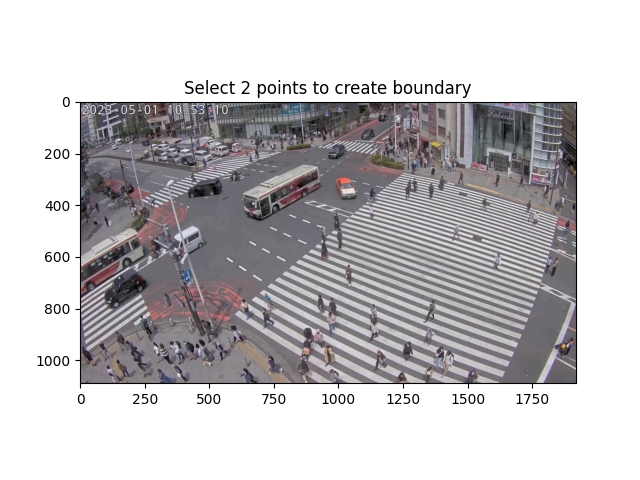

In [45]:
CLICKED_POINTS = []
BOUNDARIES = []
first_image = get_still_images_from_video('small_shinjuku_1.mp4',{0})[0]
fig, AX1 = plt.subplots()
AX1.cla()
AX1.set_title("Select 2 points to create boundary")
tmp=first_image.copy()
tmp=tmp[:,:,::-1]
AX1.imshow(tmp)

def onclick_boundary(event):
    global AX1, CLICKED_POINTS,first_image,BOUNDARIES
    ix, iy = event.xdata, event.ydata
    AX1.cla()
    AX1.set_title("Select 2 points to create boundary")
    if ix and iy:
      coords = [int(ix),int(iy)]
      CLICKED_POINTS.append(coords)
      if len(CLICKED_POINTS)>=2:
        BOUNDARIES.append(CLICKED_POINTS[:2])
        CLICKED_POINTS = []
      elif len(CLICKED_POINTS)==1:
        show_point(CLICKED_POINTS[0],1,AX1)
    tmp=first_image.copy()
    for tmp_points in BOUNDARIES:
      visualize_line(tmp,tmp_points)
    tmp=tmp[:,:,::-1]
    AX1.imshow(tmp)

cid = fig.canvas.mpl_connect('button_press_event', onclick_boundary)

In [50]:
print(f"You have {len(BOUNDARIES)} boundaries with coordinates below:\n")
for boundary in BOUNDARIES:
  print(boundary)

You have 2 boundaries with coordinates below:

[[1025, 456], [1776, 723]]
[[804, 638], [1675, 975]]


In [47]:
class Counter:
    def __init__(self,boundary,direction_type='up-down'):
        assert direction_type in {'up-down','left-right'}
        self.direction_type=direction_type
        self.boundary = boundary # point0, point2
        self.reset()
    def check_crosses(self,objs):
        for obj in objs:
            if not obj.get_has_crossed():
                cross_direction = self.check_cross(obj)
                if cross_direction != 'None':
                    obj.mark_crossed()
                    self.totals[cross_direction]+=1
    def reset(self):
        self.totals = {'left':0,'right':0}
        if self.direction_type=='up-down':
          self.totals = {'up':0,'down':0}

    def check_cross(self,obj):
        x0_0, y0_0 = self.boundary[0]
        x1_0, y1_0 = self.boundary[1]
        x0_1, y0_1 = obj.get_start_centroid()
        x1_1, y1_1 = obj.get_current_centroid()
        dx0 = x1_0 - x0_0
        dy0 = y1_0 - y0_0
        dx1 = x1_1 - x0_1
        dy1 = y1_1 - y0_1
        denominator = dx1 * dy0 - dy1 * dx0
        if denominator == 0:
            return 'None'  # lines are parallel
        t = ((x0_0 - x0_1) * dy1 - (y0_0 - y0_1) * dx1) / denominator
        u = ((x0_0 - x0_1) * dy0 - (y0_0 - y0_1) * dx0) / denominator
        if 0 <= t <= 1 and 0 <= u <= 1:
            # UP DOWN
            if self.direction_type=='up-down':
                if y1_1 > y0_1:
                    return 'down'
                return 'up'
            # LEFT RIGHT
            if x1_1 > x0_1:
                return 'right'
            return 'left'
        return 'None'  # segments do not intersect
    def get_results(self):
        return self.totals
    def get_boundary(self):
        return self.boundary


In [51]:
def run_counting(vid_name,boundaries,max_frames=300,output='tmp'):
    cam = cv2.VideoCapture(vid_name)
    vw = VideoWriter(output)

    tracker = Tracker()

    counters = [Counter(boundary) for boundary in boundaries]

    frame_num = 0
    while frame_num<max_frames:
      ret,img = cam.read()
      if not ret:
        break
      # Run object detector on image
      result = model(img)
      detections = get_detections_from_results(result)
      detections = filter_detections(detections)

      #Track the object boxes
      tracker.track([det.box for det in detections])
      visualize_tracker(img,tracker)

      #Count
      for counter in counters:
        visualize_line(img,counter.get_boundary())
        counter.check_crosses(tracker.get_objects())
      counts = [counter.get_results() for counter in counters]

      # Get counts and display that on image
      text=' | '.join([f"{count}" for count in counts])
      display_text_box(img,text)

      vw.write(img)

      frame_num+=1
    vw.release()


FILENAME = 'small_shinjuku_1.mp4'
OUTPUT = 'tmp'
run_counting(FILENAME,BOUNDARIES,output=OUTPUT)

# Show video
mp4 = open(OUTPUT+'.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)


0: 384x640 6 heads, 50 persons, 125.2ms
Speed: 4.6ms preprocess, 125.2ms inference, 7.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 heads, 44 persons, 150.7ms
Speed: 9.4ms preprocess, 150.7ms inference, 7.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 heads, 49 persons, 118.8ms
Speed: 9.8ms preprocess, 118.8ms inference, 7.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 heads, 43 persons, 118.7ms
Speed: 5.9ms preprocess, 118.7ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 heads, 35 persons, 124.9ms
Speed: 5.7ms preprocess, 124.9ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 head, 34 persons, 127.0ms
Speed: 10.6ms preprocess, 127.0ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 heads, 37 persons, 115.3ms
Speed: 8.2ms preprocess, 115.3ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 heads, 37 per